# IBM’s Fez machine
This notebook performs the optimization and compilation of the files for the [IBM’s Fez machine](https://quantum.cloud.ibm.com/computers?system=ibm_fez).

The public class for the Fez machine representation has been downloaded and included in the project to avoid bugs and ensure a correct working.

In [3]:
# Importing the libraries
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.converters import circuit_to_dag, dag_to_circuit
from collections import OrderedDict
import qiskit

# Importing the Fez architecture
from fez import FakeFez

def remove_idle_qwires(circ):
    """
    Removes useless wites from the circuit diagram.
    """
    dag = circuit_to_dag(circ)

    idle_wires = list(dag.idle_wires())
    for w in idle_wires:
        dag._remove_idle_wire(w)
        dag.qubits.remove(w)

    dag.qregs = OrderedDict()

    return dag_to_circuit(dag)

def visualize_qasm(path: str):
    """
    Load a QASM file and display its circuit diagram.
    """
    qc = QuantumCircuit.from_qasm_file(path)
    return qc.draw(output="mpl", idle_wires=False, filename="optimized_circuit.png", scale=0.1, fold=10, vertical_compression="low")

def visualize_qasm_optimised(path: str):
    """
    Load a QASM file, optimise, display circuit diagram
    """

    qc_with_ancilla = QuantumCircuit.from_qasm_file(path)
    qc = remove_idle_qwires(qc_with_ancilla)
    print(qc.num_nonlocal_gates())
    backend = FakeFez() # Loads the backend of the IBM's Fez machine
    config = backend.configuration() # Store the configuration

    # Circuit transpiled without optimizing
    best_qc = transpile(circuits = qc, basis_gates=config.basis_gates, coupling_map=config.coupling_map, optimization_level=0)
    print("Total of 2-qbit gaits NOT OPTIMIZED: ", best_qc.num_nonlocal_gates())
    
    # Optimization of the circuit
    for _ in range(10):
        transpiled_qc = transpile(circuits = qc, basis_gates=config.basis_gates, coupling_map=config.coupling_map, optimization_level=3)
        if transpiled_qc.num_nonlocal_gates() < best_qc.num_nonlocal_gates():
            best_qc = transpiled_qc

    print("Total of 2-qbit gaits OPTIMIZED: ", best_qc.num_nonlocal_gates())

    return best_qc.draw(output = "mpl", idle_wires=False, filename="optimized_circuit.png", scale=0.1, fold=10, vertical_compression="low")

In [15]:
visualize_qasm("big_circuits/2.qasm") # Works for every circuit included in the "circuits" and "big_circuits" directories

Total 2-qbit gates before optimizing:  299


1695
Total of 2-qbit gaits NOT OPTIMIZED:  4545
Total of 2-qbit gaits OPTIMIZED:  1695


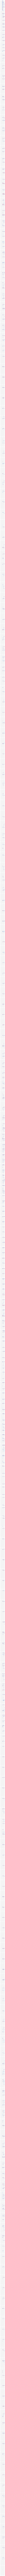

In [4]:
visualize_qasm_optimised("big_circuits/3.qasm")